<a href="https://colab.research.google.com/github/Mithula-cbw/jupyter-notebooks-public/blob/main/DIPCV_LAB05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 04 - Digital Image Processing
2026.01.14  
Fc211025

In [ ]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [ ]:
# Load the image in grayscale mode
image = cv2.imread('roxy.jpg', cv2.IMREAD_GRAYSCALE)


In [ ]:
# Define the kernel size for the mean filter
kernel_size = 5

## Mean Filter

In [ ]:
# Mean filter function
def mean_filter(image, kernel_size):
    padded_image = cv2.copyMakeBorder(image,
                                      kernel_size//2, kernel_size//2,
                                      kernel_size//2, kernel_size//2,
                                      cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
          window = padded_image[y:y+kernel_size, x:x+kernel_size]
          mean_value = np.mean(window)
          filtered_image[y, x] = mean_value

    return filtered_image

In [ ]:
# Apply the mean filter to the image
filtered_image_mean = mean_filter(image, kernel_size )

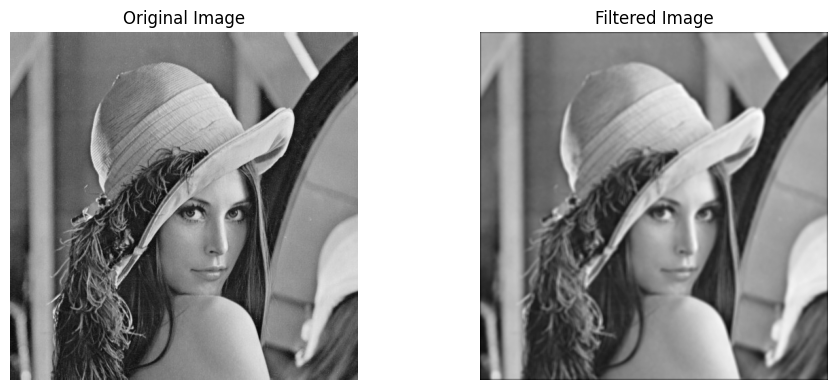

In [ ]:
# Display the original and filtered image side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_mean, cmap="gray")
plt.title("Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()


## Gaussian Filter

In [ ]:
# Define function for gaussian filter
def gaussian_filter(size, size_y=None):
  size = int(size)
  if not size_y:
    size_y = size
  else:
    size_y = int(size_y)
  x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
  g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
  return g / g.sum()


In [ ]:
# Make the Gaussian kernel by calling the function
kernel_size = 49 # or 7 or experiment with any number

gaussian_kernel_array = gaussian_filter(kernel_size)

filtered_image_gaussian = convolve(image, gaussian_kernel_array)



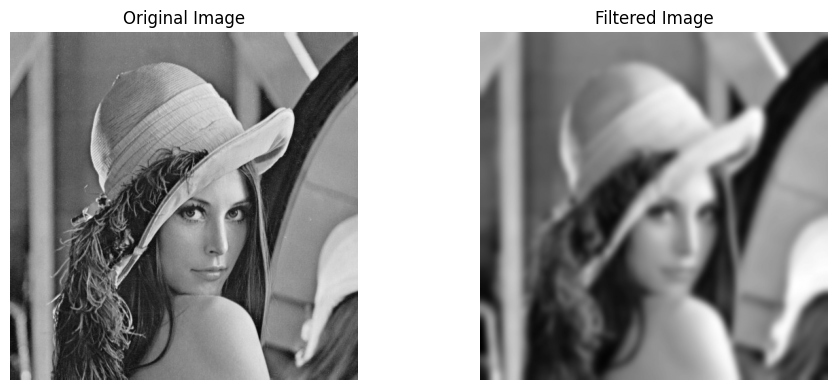

In [ ]:
# Display the original and filtered image side by side (after gaussian filter)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_gaussian, cmap="gray")
plt.title("Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()


## Sobel filter

In [ ]:
def sobel_filter(image):
  sobel_x_kernel = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

  sobel_y_kernel = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

  sobel_x = cv2.filter2D(image, cv2.CV_64F, sobel_x_kernel)
  sobel_y = cv2.filter2D(image, cv2.CV_64F, sobel_y_kernel)

  gradient_magnitude = np.sqrt(sobel_x*2 + sobel_y*2)

  normalized_gradient = cv2.normalize(
      gradient_magnitude,
      None,
      0,
      255,
      cv2.NORM_MINMAX,
      cv2.CV_8U
  )

  return normalized_gradient, sobel_x, sobel_y

/tmp/ipython-input-3223925764.py:13: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(sobel_x*2 + sobel_y*2)


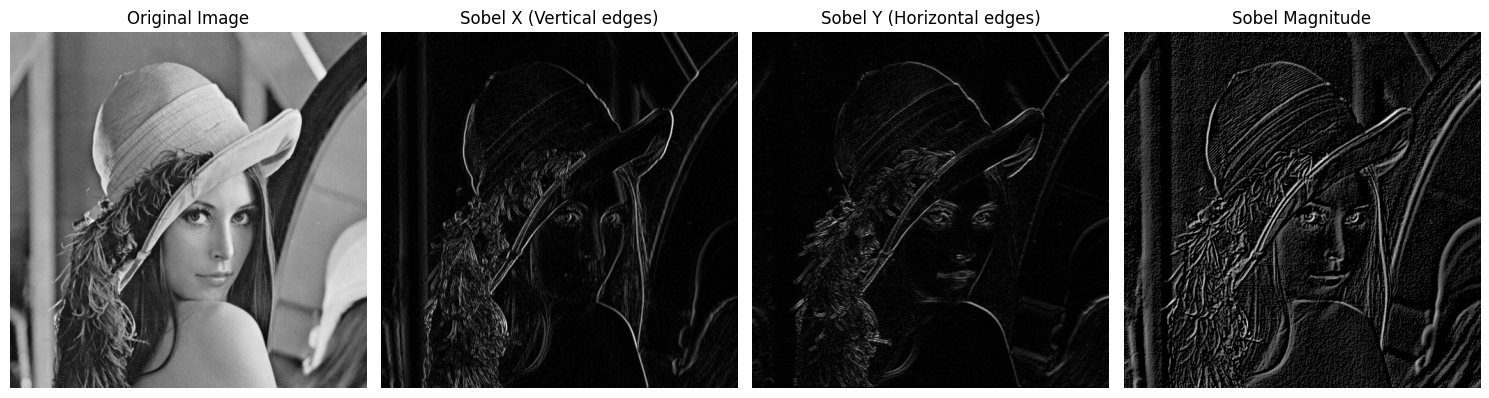

In [ ]:
sobel_image, sobel_x, sobel_y = sobel_filter(image)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.title('Sobel X (Vertical edges)')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.title('Sobel Y (Horizontal edges)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(sobel_i, cmap='gray')
plt.title('Sobel Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

# Personal Test

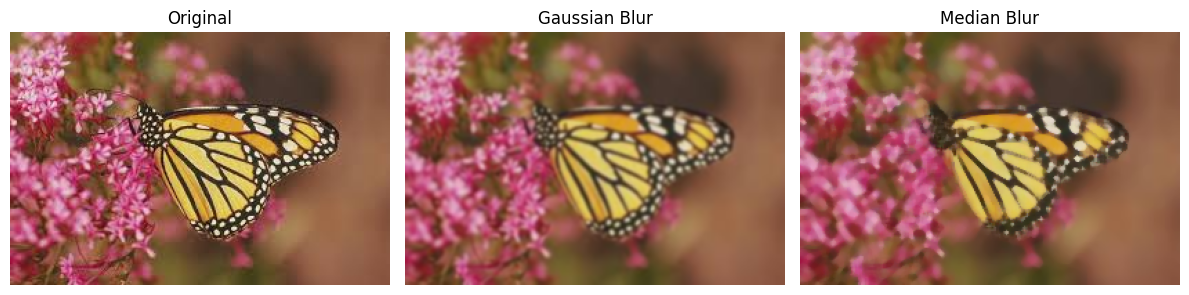

Saved: comparison_3_images.png


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
IMAGE_PATH = "btfly.jpg"  # change to your image path
img_bgr = cv2.imread(IMAGE_PATH)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read image: {IMAGE_PATH}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Apply filters (tweak these params if needed) ---
gaussian = cv2.GaussianBlur(img_rgb, (5, 5), 0)
median = cv2.medianBlur(img_rgb, 5)

# Plot 3 images side-by-side ---
titles = ["Original", "Gaussian Blur", "Median Blur"]
images = [img_rgb, gaussian, median]

plt.figure(figsize=(12, 4))

for i, (im, t) in enumerate(zip(images, titles), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(im)
    plt.title(t)
    plt.axis("off")

plt.tight_layout()
plt.savefig("comparison_3_images.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: comparison_3_images.png")


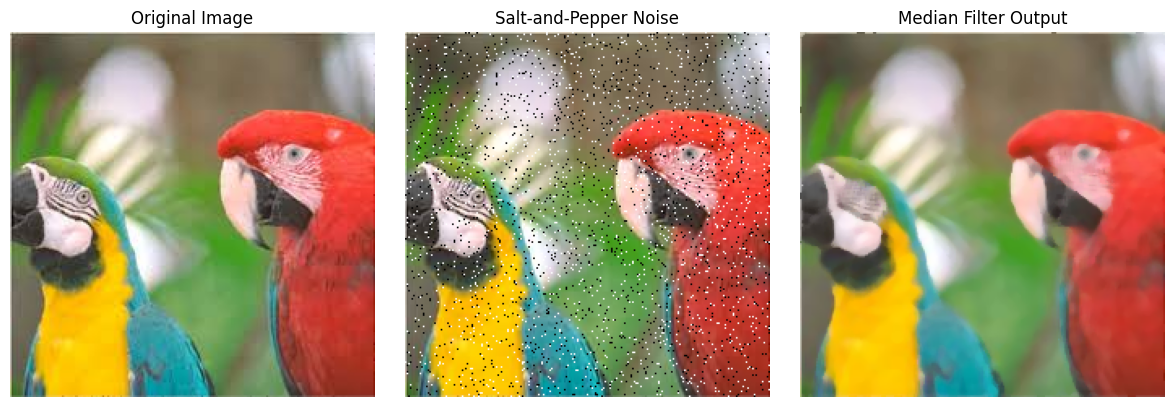

Saved: salt_pepper_median_comparison.png


In [5]:

# Load image
IMAGE_PATH = "maco.jpg"  # change path if needed
img_bgr = cv2.imread(IMAGE_PATH)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read image: {IMAGE_PATH}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Add salt-and-pepper noise
def add_salt_pepper_noise(image, amount=0.02):
    noisy = image.copy()
    h, w, c = noisy.shape
    num_pixels = int(amount * h * w)

    # Salt noise (white pixels)
    coords = (
        np.random.randint(0, h, num_pixels),
        np.random.randint(0, w, num_pixels)
    )
    noisy[coords[0], coords[1]] = [255, 255, 255]

    # Pepper noise (black pixels)
    coords = (
        np.random.randint(0, h, num_pixels),
        np.random.randint(0, w, num_pixels)
    )
    noisy[coords[0], coords[1]] = [0, 0, 0]

    return noisy

noisy_img = add_salt_pepper_noise(img_rgb, amount=0.03)

#  Apply median filter
median_filtered = cv2.medianBlur(noisy_img, 5)  # kernel size must be odd

# Plot comparison
titles = ["Original Image", "Salt-and-Pepper Noise", "Median Filter Output"]
images = [img_rgb, noisy_img, median_filtered]

plt.figure(figsize=(12, 4))

for i, (img, title) in enumerate(zip(images, titles), start=1):
    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.savefig("salt_pepper_median_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved: salt_pepper_median_comparison.png")
